In [1]:
# Wrangling
import pandas as pd
import numpy as np

# Viz

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier





# Pré - Processing

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score

#Tunning

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.optimizer.dummy import dummy_minimize
from skopt import gp_minimize
from skopt.plots import plot_convergence  



In [2]:
# Leitura e visualização do dataset
df = pd.read_csv('/content/streaming_data.csv')

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


### Data Understanding

In [3]:
# Tipos de dado

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


10 features contendo 3 variáveis categóricas e 7 numéricas.
Alguns Valores nulos em todas as colunas.

In [4]:
# Descrição Estatística dos dados

df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [5]:
df.drop_duplicates()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
65476,60.0,Female,6395.0,NaN,NaN,NaN,4,NaN,1.0,c22f5b98-2e2c-486d-a589-c6e07130e821
65477,NaN,Male,NaN,4.0,NaN,NaN,4,2.37,0.0,1d84261c-6e29-4cb7-9f18-9b12cd45b087
65478,41.0,Male,4654.0,3.0,NaN,NaN,4,NaN,1.0,d0543cfb-4bc4-4ea8-8508-7004675749bd
65479,42.0,Male,5835.0,5.0,Basic,NaN,1,1.18,0.0,06868b80-fd40-429d-93ad-b4b2338cbf0d


Os valores de todas as features parecem ser razoáveis e verdadeiros. Tenho que checar apenas se valor de 0 (Time_on_platform) faz sentido.

In [6]:
# Verificando valores faltantes
df.isna()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
77879,False,False,True,True,False,True,False,False,False,False
77880,False,False,False,True,False,True,False,False,False,False
77881,False,False,True,False,False,True,False,False,False,False
77882,False,False,False,False,False,True,False,True,False,False


Vou substituir os valores NaN das colunas numéricas e apagar o dado se for nas colunas : Age,Gender e User_id

### Data Preparation

In [7]:
# Retirando colunas com valores NAN

df.dropna(subset='Age',  axis=0, inplace = True)
df.dropna(subset='Gender',  axis=0, inplace = True)
df.dropna(subset='User_id',  axis=0, inplace = True)
df.dropna(subset='Subscription_type',  axis=0, inplace = True)

In [8]:
# Substituindo NaN por 0

df.fillna(0,inplace = True)

In [9]:

df.drop(columns = 'User_id', inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
# transformando colunas categóricas em numéricas

le = preprocessing.LabelEncoder()

le.fit(df.Gender)
df.Gender = le.transform(df.Gender)

le.fit(df.Subscription_type)
df.Subscription_type = le.transform(df.Subscription_type)



In [12]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49.0,1,4700.0,3.0,0,0.0,3,0.00,0.0
1,69.0,0,6107.0,2.0,2,0.0,1,2.14,0.0
2,44.0,1,6374.0,3.0,1,1.0,1,1.91,1.0
3,26.0,1,0.0,5.0,0,0.0,2,0.00,0.0
5,54.0,1,3024.0,2.0,0,0.0,1,0.00,0.0


In [13]:
# Transformando coluns Churned em string
df['Churned'] = df['Churned'].astype(str) 


In [14]:
# Replace na coluna Churned
df['Churned'] = df['Churned'].replace('1.0','Yes')
df['Churned'] = df['Churned'].replace('0.0','No')

In [15]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49.0,1,4700.0,3.0,0,0.0,3,0.00,No
1,69.0,0,6107.0,2.0,2,0.0,1,2.14,No
2,44.0,1,6374.0,3.0,1,1.0,1,1.91,Yes
3,26.0,1,0.0,5.0,0,0.0,2,0.00,No
5,54.0,1,3024.0,2.0,0,0.0,1,0.00,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  int64  
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  int64  
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 2.8+ MB


<Axes: >

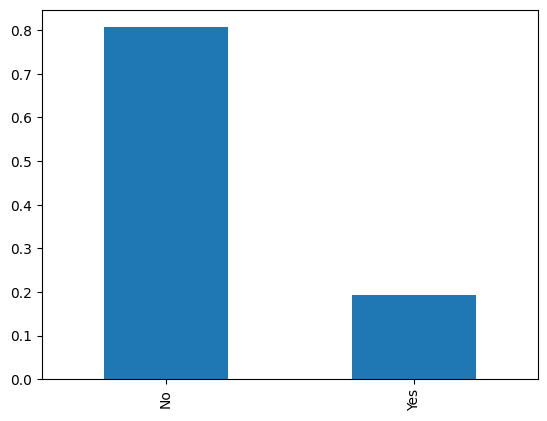

In [17]:
df['Churned'].value_counts(normalize = True).plot(kind = 'bar')

### Regressão Logística


In [220]:
# Dividindo dataset em x e y(target)
x = df.drop(columns = 'Churned')

y = df['Churned']


In [221]:
# Pre-processamento de x
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Aplicando oversampling com SMOTE
oversampler = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(X_scaled, y)

#### Testanto melhores modelos

In [223]:


# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

# Lista de modelos a serem testados
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Dicionário para armazenar os resultados
results = {}

# Treinamento e avaliação para cada modelo
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_test_binary = np.where(y_test == 'Yes', 1, 0)
    y_pred_binary = np.where(y_pred == 'Yes', 1, 0)

    roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)

    results[name] = {
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Imprimir os resultados
for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

--- Logistic Regression ---
ROC AUC: 0.510076211770961
Accuracy: 0.5095892735913102
Precision: 0.5045266226791468
Recall: 0.5632065775950668

--- Decision Tree ---
ROC AUC: 0.7899322750247258
Accuracy: 0.7898845892735913
Precision: 0.7838568051334008
Recall: 0.7951353203151764

--- Random Forest ---
ROC AUC: 0.8807864476762255
Accuracy: 0.8810251188051595
Precision: 0.90007215007215
Recall: 0.8547447756080849

--- Gradient Boosting ---
ROC AUC: 0.7333545589649083
Accuracy: 0.7352342158859471
Precision: 0.8939130434782608
Recall: 0.5282631038026722



Portanto,como podemos ver, o modelo de regressão logistica é o que menos oferece acurácia e contém os piores resultados.

Entretanto, o modelo de Random Forest possui as melhores acurácias.

#### Testando o melhor balanceamento de dataset

In [20]:


# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Opções de abordagens
approaches = ['No balancing', 'SMOTE', 'Undersampling', 'Combined']

# Resultados
results = {}

# Treinamento e avaliação para cada abordagem
for approach in approaches:
    if approach == 'No balancing':
        # Treinamento sem balanceamento
        model = LogisticRegression(random_state=42)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    elif approach == 'SMOTE':
        # Aplicando oversampling com SMOTE
        oversampler = SMOTE(random_state=42)
        x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train)
        model = LogisticRegression(random_state=42)
        model.fit(x_train_balanced, y_train_balanced)
        y_pred = model.predict(x_test)
    elif approach == 'Undersampling':
        # Aplicando undersampling
        undersampler = RandomUnderSampler(random_state=42)
        x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train, y_train)
        model = LogisticRegression(random_state=42)
        model.fit(x_train_balanced, y_train_balanced)
        y_pred = model.predict(x_test)
    elif approach == 'Combined':
        # Aplicando SMOTE e undersampling combinados
        oversampler = SMOTE(random_state=42)
        x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train)
        undersampler = RandomUnderSampler(random_state=42)
        x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train_balanced, y_train_balanced)
        model = LogisticRegression(random_state=42)
        model.fit(x_train_balanced, y_train_balanced)
        y_pred = model.predict(x_test)
    else:
        continue

    y_test_binary = np.where(y_test == 'Yes', 1, 0)
    y_pred_binary = np.where(y_pred == 'Yes', 1, 0)
    # Cálculo das métricas
    roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)

    # Armazenamento dos resultados
    results[approach] = {
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Impressão dos resultados
for approach, metrics in results.items():
    print(f"--- {approach} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- No balancing ---
ROC AUC: 0.5
Accuracy: 0.8078871696563056
Precision: 0.0
Recall: 0.0

--- SMOTE ---
ROC AUC: 0.5023316259347403
Accuracy: 0.5026701355607285
Precision: 0.1935661259279626
Recall: 0.5017818959372773

--- Undersampling ---
ROC AUC: 0.5032682991652271
Accuracy: 0.49979460495686706
Precision: 0.19412724306688417
Recall: 0.5089094796863863

--- Combined ---
ROC AUC: 0.5023316259347403
Accuracy: 0.5026701355607285
Precision: 0.1935661259279626
Recall: 0.5017818959372773



Podemos ver que claramente o sem balanceamento sofre impactos no modelo.
De acordo com o ROC AUC, o m elhor balanceamento seria o SMOTE.
A métrica principal que temos que nos preocupar aqui é o ROC AUC, pois ela é uma métrica mais geral para avaliar o modelo.

Caso nao houvesse o balanceamento, como existe uma grande disproporção entre os dados, a acurácia e precisão provavelmente iriam ser muito altos, pois se todos os valores previstos sçao iguais e os verdadeiros são 80% iguais, a acurácia é alta, mas o modelo esta envisesado. Portanto, vou balancear com um SMOTE

#### Aplicando Modelo

In [160]:
# Aplicando oversampling com SMOTE
oversampler = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(X_scaled, y)


In [161]:
# treino e teste
x_train, x_test, y_train,y_test = train_test_split(x_train_balanced,y_train_balanced,test_size = 0.2)

# Criando instancia para a regressão logística
model = LogisticRegression(random_state=42)

# Treinando o modelo
model.fit(x_train, y_train)

# predizendo valores
y_pred = model.predict(x_test)

In [162]:
# Métricas de desempenho

y_test = np.where(y_test == 'Yes', 1, 0) # transformando variáveis 'Yes' e 'No' do array em números, assim o algoritmo consegue calcular melhor as métricas
y_pred = np.where(y_pred == 'Yes', 1, 0)

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('roc_auc:',roc_auc)
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)

roc_auc: 0.510589515740778
accuracy: 0.5096741344195519
precision: 0.52
recall: 0.45381660263905127


O modelo possui métricas ruins, como o  esperado.

Matriz de Confusão:


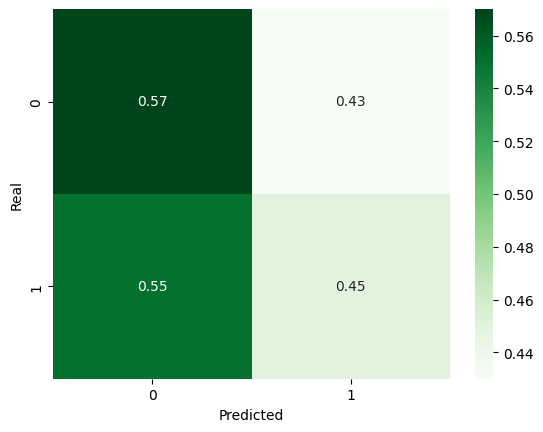

In [163]:
# Calculando matriz confusão
confusion = confusion_matrix(y_test, y_pred)

# Calculando Matriz normalizada
matriz_normalizada = np.round(confusion/np.sum(confusion,axis = 1).reshape(-1,1),2)

# Plotando a matriz graficamente
print("Matriz de Confusão:")

sns.heatmap(matriz_normalizada,cmap = 'Greens',annot = True)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

### Tunning - Regressão Logística

In [75]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [194]:

# Definir os parâmetros para ajuste
param_grid = {
    'C': [5.0, 9.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Executar o Grid Search com os dados de treinamento
grid_search.fit(x_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(grid_search.best_params_)

# Imprimir a melhor pontuação (score)
print("Melhor pontuação (accuracy):", grid_search.best_score_)

KeyboardInterrupt: ignored

In [77]:
model_tunned1 = LogisticRegression( C = 9.0, penalty = 'l1',solver = 'liblinear', class_weight = 'balanced',max_iter = 200)
model_tunned1.fit(x_train,y_train)

LogisticRegression(C=9.0, class_weight='balanced', max_iter=200, penalty='l1',
                   solver='liblinear')

In [78]:
predict_tunned1 = model_tunned1.predict(x_test)

Matriz de Confusão:


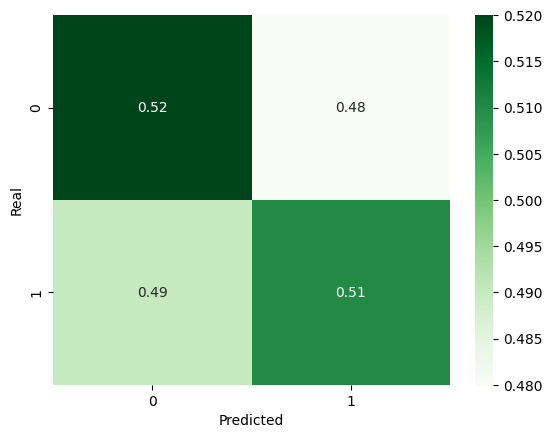

In [79]:
# Calculando matriz confusão
confusion_tunned1 = confusion_matrix(y_test, predict_tunned1)

# Calculando Matriz normalizada
matriz_normalizada_tunned1 = np.round(confusion_tunned1/np.sum(confusion_tunned1,axis = 1).reshape(-1,1),2)

# Plotando a matriz graficamente
print("Matriz de Confusão:")

sns.heatmap(matriz_normalizada_tunned1,cmap = 'Greens',annot = True)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [80]:
y_test_bin2 = np.where(y_test == "Yes", 1, 0)
y_pred_bin2 = np.where(predict_tunned1 == "Yes", 1, 0)



# Calculando a precisão
precision = precision_score(y_test_bin2, y_pred_bin2)
print("Precisão:", precision)

# Calculando o recall
recall = recall_score(y_test_bin2, y_pred_bin2)
print("Recall:", recall)

# Calculando o F1-Score
f1 = f1_score(y_test_bin2, y_pred_bin2)
print("F1-Score:", f1)

# Calculando a AUC-ROC
auc_roc = roc_auc_score(y_test_bin2, y_pred_bin2)
print("AUC-ROC:", auc_roc)



Precisão: 0.5124292816732384
Recall: 0.5056673997631534
F1-Score: 0.5090258855585831
AUC-ROC: 0.5107087211654181


### Random Forest

In [273]:
# Separando variáveis para treinar
x = df.drop(columns = 'Churned')

y = df['Churned']

In [274]:
# Pre_processamento de x
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

Como o dataset está desbalanceado, é interessante identificar o impacto de cada balanceamento do modelo 

In [277]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Opções de abordagens
approaches = ['No balancing', 'SMOTE', 'Undersampling', 'Combined']

# Resultados
results = {}

# Treinamento e avaliação para cada abordagem
for approach in approaches:
    if approach == 'No balancing':
        # Treinamento sem balanceamento
        model = RandomForestClassifier(random_state=42)
        model.fit(x_train, y_train)
        y_pred = model.predict_proba(x_test)[:, 1]  # Probabilidades da classe positiva
    elif approach == 'SMOTE':
        # Aplicando oversampling com SMOTE
        oversampler = SMOTE(random_state=42)
        x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train)
        model = RandomForestClassifier(random_state=42)
        model.fit(x_train_balanced, y_train_balanced)
        y_pred = model.predict_proba(x_test)[:, 1]  # Probabilidades da classe positiva
    elif approach == 'Undersampling':
        # Aplicando undersampling
        undersampler = RandomUnderSampler(random_state=42)
        x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train, y_train)
        model = RandomForestClassifier(random_state=42)
        model.fit(x_train_balanced, y_train_balanced)
        y_pred = model.predict_proba(x_test)[:, 1]  # Probabilidades da classe positiva
    elif approach == 'Combined':
        # Aplicando SMOTE e undersampling combinados
        oversampler = SMOTE(random_state=42)
        x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train)
        undersampler = RandomUnderSampler(random_state=42)
        x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train_balanced, y_train_balanced)
        model = RandomForestClassifier(random_state=42)
        model.fit(x_train_balanced, y_train_balanced)
        y_pred = model.predict_proba(x_test)[:, 1]  # Probabilidades da classe positiva
    else:
        continue

    # Cálculo das métricas
    y_true_numeric = np.where(y_test == 'Yes', 1, 0)  # Converter labels verdadeiras para valores numéricos
    y_pred_numeric = np.round(y_pred)  # Arredondar as previsões para obter valores numéricos

    roc_auc = roc_auc_score(y_true_numeric, y_pred_numeric)
    accuracy = accuracy_score(y_true_numeric, y_pred_numeric)
    precision = precision_score(y_true_numeric, y_pred_numeric, zero_division=0)
    recall = recall_score(y_true_numeric, y_pred_numeric, zero_division=0)

    # Armazenamento dos resultados
    results[approach] = {
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Impressão dos resultados
for approach, metrics in results.items():
    print(f"--- {approach} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

--- No balancing ---
ROC AUC: 0.6236876789446344
Accuracy: 0.8484184581678762
Precision: 0.8441860465116279
Recall: 0.2587312900926586

--- SMOTE ---
ROC AUC: 0.6256208850284499
Accuracy: 0.8006298781322744
Precision: 0.47378832838773494
Recall: 0.3414112615823236

--- Undersampling ---
ROC AUC: 0.6008732498157701
Accuracy: 0.5960564151718472
Precision: 0.2623655913978495
Recall: 0.6086956521739131

--- Combined ---
ROC AUC: 0.6231088345796537
Accuracy: 0.8000821580172531
Precision: 0.47147147147147145
Recall: 0.33570919458303633



A métrica principal que temos que nos preocupar aqui é o ROC AUC, pois ela é uma métrica mais geral para avaliar o modelo.

Caso nao houvesse o balanceamento, como existe uma grande disproporção entre os dados, a acurácia e precisão provavelmente iriam ser muito altos, pois se todos os valores previstos sçao iguais e os verdadeiros são 80% iguais, a acurácia é alta, mas o modelo esta envisesado.
Portanto, vou balancear com um SMOTE

In [267]:
# Aplicando oversampling com SMOTE
oversampler = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(X_scaled, y)


In [268]:
# treino e teste
x_train, x_test, y_train,y_test = train_test_split(x_train_balanced,y_train_balanced,test_size = 0.2)

In [269]:
# Criando instância
arvore = RandomForestClassifier()
# Treinando Modelo
modelo = arvore.fit(x_train, y_train)

# predizendo valores
y_pred = modelo.predict(x_test)

In [270]:

# Métricas

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, pos_label = 'Yes')
recall = recall_score(y_test, y_pred, pos_label = 'Yes')
f1 = f1_score(y_test, y_pred, pos_label = 'Yes')
# Imprimir as métricas
print("Acurácia:", accuracy)

print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8860319076714189
Precisão: 0.9010389153019898
Recall: 0.8675822312648356
F1-score: 0.8839941262848752


O Modelo tem valores muito bons. Vamo tuná-lo e ver e consseguimos aumentar ainda mais suas métricas.

Matriz de Confusão:


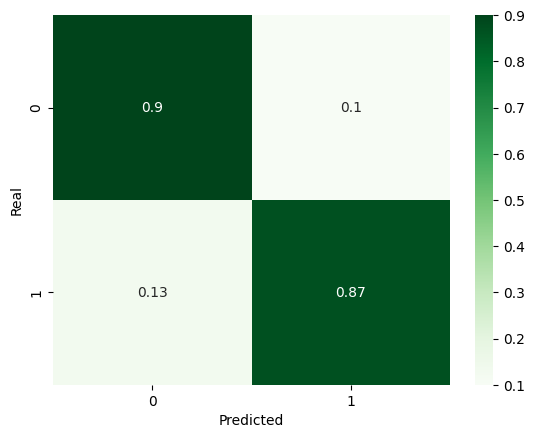

In [271]:
# Calculando matriz confusão
confusao_tree = confusion_matrix(y_test, y_pred)

# Calculando Matriz normalizada
matriz_normalizada_tree= np.round(confusao_tree/np.sum(confusao_tree,axis = 1).reshape(-1,1),2)

# Plotando a matriz graficamente
print("Matriz de Confusão:")

sns.heatmap(matriz_normalizada_tree,cmap = 'Greens',annot = True)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

### Tunning - Árvore de Decisão

Para encontrar o melhor tunnning para o meu modelo, vou testar algumas bibliotecas diferentes e ver quais geram os melhores resultados

#### Pelo dummy minimize

In [232]:
# Criando função de tunning para encontrar os melhores hiperparâmetros
def tunning(params):
  max_depth  = params[0]
  min_samples_split = params[1]
  min_samples_leaf = params[2]
  max_features = params[3]
  n_estimators = params[4]

  model_tun = RandomForestClassifier(max_depth  =max_depth ,min_samples_split =min_samples_split ,min_samples_leaf =min_samples_leaf,max_features =int(max_features),
                                 n_estimators =n_estimators)

  model_tun.fit(x_train, y_train)
  p = model_tun.predict_proba(x_test)[:,1]
  return -roc_auc_score(y_test,p)
space = [(1, 20),(2, 10),(1, 5),(1, x_train_balanced.shape[1]),(10, 100)]

resultado = dummy_minimize(tunning,space,random_state = 1,verbose =1,n_calls = 30)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.4799
Function value obtained: -0.8015
Current minimum: -0.8015
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.4661
Function value obtained: -0.8875
Current minimum: -0.8875
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.5887
Function value obtained: -0.7473
Current minimum: -0.8875
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.0627
Function value obtained: -0.7074
Current minimum: -0.8875
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 20.3155
Function value obtained: -0.8391
Current minimum: -0.8875
Iteration No: 6 started.

In [235]:
best_params = resultado.x
best_score = -resultado.fun  # Convertendo o valor negativo de volta para positivo

# Treinando o modelo com os melhores hiperparâmetros encontrados
model = RandomForestClassifier(max_depth=best_params[0], min_samples_split=best_params[1],
                                    min_samples_leaf=best_params[2], max_features=int(best_params[3]),
                                    n_estimators =best_params[4])
model.fit(x_train, y_train)

# Realizando previsões no conjunto de teste
y_pred = model.predict(x_test)


y_test_binary = np.where(y_test == 'Yes', 1, 0)
y_pred_binary = np.where(y_pred == 'Yes', 1, 0)

# Calculando a métrica final (por exemplo, AUC-ROC)
final_metric = roc_auc_score(y_test_binary, y_pred_binary)

# Calculando a métrica final (por exemplo, AUC-ROC)


print("Melhores hiperparâmetros encontrados:", best_params)
print("Melhor pontuação (negativa):", resultado.fun)
print("Melhor pontuação (positiva):", best_score)
print("Métrica final:", final_metric)

Melhores hiperparâmetros encontrados: [19, 2, 5, 2, 97]
Melhor pontuação (negativa): -0.8921750494606164
Melhor pontuação (positiva): 0.8921750494606164
Métrica final: 0.8172779683622015


In [236]:
resultado.x

[19, 2, 5, 2, 97]

In [238]:
# Tunando com os parâmetros encontrados
arvore_tun_dummy = RandomForestClassifier(
  max_depth  = 19,
  min_samples_split = 2,
  min_samples_leaf = 5,
  max_features = 2,
  n_estimators = 97
)

modelo_tunn_1 = arvore_tun_dummy.fit(x_train, y_train)

y_pred_tun_1 = modelo_tunn_1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_tun_1)
precision = precision_score(y_test, y_pred_tun_1, pos_label = 'Yes')
recall = recall_score(y_test, y_pred_tun_1, pos_label = 'Yes')
f1 = f1_score(y_test, y_pred_tun_1, pos_label = 'Yes')
# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8177189409368636
Precisão: 0.8752726551655761
Recall: 0.7439743805831789
F1-score: 0.8043002915451896


#### GP minimize

In [239]:
# Aplicando função tunning ao GP minimize
resulktado_gp = gp_minimize(tunning,space,random_state = 1,verbose =1,n_calls = 30,n_random_starts=15)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 9.5782
Function value obtained: -0.8802
Current minimum: -0.8802
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 11.9574
Function value obtained: -0.7440
Current minimum: -0.8802
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.7244
Function value obtained: -0.7259
Current minimum: -0.8802
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 18.8772
Function value obtained: -0.8767
Current minimum: -0.8802
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.1873
Function value obtained: -0.8570
Current minimum: -0.8802
Iteration No: 6 starte

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 5.7590
Function value obtained: -0.9263
Current minimum: -0.9281
Iteration No: 27 started. Searching for the next optimal point.


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 6.4129
Function value obtained: -0.9275
Current minimum: -0.9281
Iteration No: 28 started. Searching for the next optimal point.


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 6.0373
Function value obtained: -0.9270
Current minimum: -0.9281
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 4.5354
Function value obtained: -0.8829
Current minimum: -0.9281
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 23.8660
Function value obtained: -0.8698
Current minimum: -0.9281


In [240]:
resulktado_gp.x

[20, 3, 1, 1, 100]

In [241]:
# Tunando com os parâmetros encontrados
arvore_tun_gp = RandomForestClassifier(
  max_depth  = 20,
  min_samples_split = 3,
  min_samples_leaf = 1,
  max_features = 1,
  n_estimators = 100
)

modelo_tunn_2 = arvore_tun_gp.fit(x_train, y_train)

y_pred_tun_2 = modelo_tunn_2.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_tun_2)
precision = precision_score(y_test, y_pred_tun_2, pos_label = 'Yes')
recall = recall_score(y_test, y_pred_tun_2, pos_label = 'Yes')
f1 = f1_score(y_test, y_pred_tun_2, pos_label = 'Yes')
# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8621860149355057
Precisão: 0.8850759606791778
Recall: 0.8346536322265296
F1-score: 0.8591256072172102


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

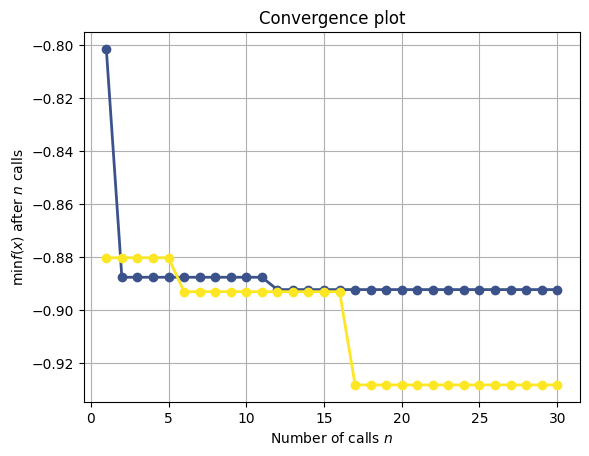

In [242]:
# Plotando como os tunning de parâmetros aprenderam a melhorar o modelo 
plot_convergence(resultado,resulktado_gp)

#### Bayesian optimize

In [247]:
# Definindo a função objetivo para a otimização bayesiana
def objective_function(max_depth, min_samples_split, min_samples_leaf, max_features, criterion):
    model = RandomForestClassifier(max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   min_samples_leaf=min_samples_leaf, 
                                   max_features=int(max_features),
                                   n_estimators= n_estimators)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return -accuracy  # Negativo para maximizar a acurácia

# Definindo os limites dos hiperparâmetros para a otimização
param_space = {
    'max_depth': Integer(3, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': (1, x_train_balanced.shape[1]),
    'n_estimators': (10, 100)
}
# Criando uma instância do estimador DecisionTreeClassifier
estimator = RandomForestClassifier()

In [248]:
opt = BayesSearchCV(estimator, param_space, n_iter=50)

In [249]:
# Executando a otimização
opt.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

BayesSearchCV(estimator=RandomForestClassifier(),
              search_spaces={'max_depth': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'max_features': (1, 8),
                             'min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': (10, 100)})

In [251]:


# Realizar previsões no conjunto de teste
y_pred_tunned = opt.predict(x_test)

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred_tunned)
precision = precision_score(y_test, y_pred_tunned, pos_label='Yes')
recall = recall_score(y_test, y_pred_tunned, pos_label='Yes')
f1 = f1_score(y_test, y_pred_tunned, pos_label='Yes')

# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8612525458248472
Precisão: 0.8826566951566952
Recall: 0.8354963762009102
F1-score: 0.8584293012382024


#### Grid Search

In [256]:
# Definir os parâmetros para ajuste
param_grid = {
    'n_estimators': (90, 100),
    'max_depth': [18,20],
    'min_samples_split': [1, 5],
    'min_samples_leaf': [1, 5],
    'max_features': (1, x_train_balanced.shape[1])
}
modelo = RandomForestClassifier()
# Criar o objeto GridSearchCV
grid_search2 = GridSearchCV(modelo, param_grid, scoring='accuracy', cv=5)



In [257]:
# Executar o Grid Search com os dados de treinamento
grid_search2.fit(x_train, y_train)

# Obter o melhor modelo
best_model = grid_search2.best_estimator_

# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred_tun = best_model.predict(x_test)

# Calcular a acurácia do modelo ajustado
accuracy = accuracy_score(y_test, y_pred_tun)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(grid_search2.best_params_)

# Imprimir a melhor pontuação (accuracy)
print("Melhor pontuação (accuracy):", grid_search2.best_score_)

# Imprimir a acurácia do modelo ajustado no conjunto de teste
print("Acurácia do modelo ajustado:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Melhores hiperparâmetros:
{'max_depth': 20, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Melhor pontuação (accuracy): 0.8416854914547558
Acurácia do modelo ajustado: 0.8560760353021045


In [258]:
grid_search2.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 1,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [259]:
arvore_tunned2 = RandomForestClassifier(ccp_alpha = 0.0,
 bootstrap = True,
 class_weight = None,
 max_depth = 20,
 max_features = 1,
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 5,
 min_weight_fraction_leaf =0.0,
 n_estimators= 100,
 n_jobs = None,
 oob_score = False,
 random_state= None,
verbose = 0,
 warm_start = False)

In [260]:
arvore_tunned2.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, max_features=1, min_samples_split=5)

In [261]:
y_pred_tunned2 = arvore_tunned2.predict(x_test)

In [262]:
accuracy = accuracy_score(y_test, y_pred_tunned2)
precision = precision_score(y_test, y_pred_tunned2, pos_label = 'Yes')
recall = recall_score(y_test, y_pred_tunned2, pos_label = 'Yes')
f1 = f1_score(y_test, y_pred_tunned2, pos_label = 'Yes')
# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8538696537678208
Precisão: 0.8820540736708401
Recall: 0.819315691892803
F1-score: 0.8495281370150296


Matriz de Confusão:


Text(50.722222222222214, 0.5, 'Real')

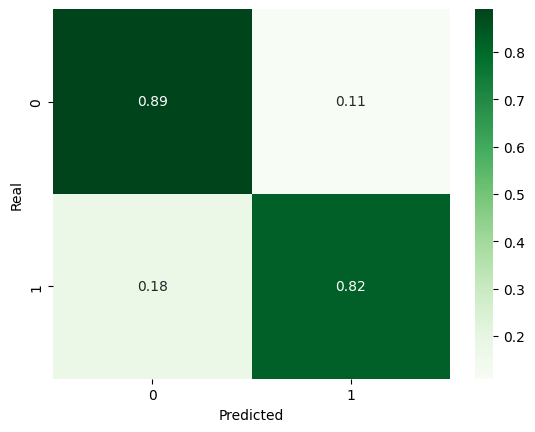

In [264]:
# Calculando matriz confusão
confusao_tree_tun = confusion_matrix(y_test, y_pred_tunned2)

# Calculando Matriz normalizada
matriz_normalizada_tree_tun= np.round(confusao_tree_tun/np.sum(confusao_tree_tun,axis = 1).reshape(-1,1),2)

# Plotando a matriz graficamente
print("Matriz de Confusão:")

sns.heatmap(matriz_normalizada_tree_tun,cmap = 'Greens',annot = True)
plt.xlabel('Predicted')
plt.ylabel('Real')

### Conclusão

Aparentemente, o melhor modelo de Random Forest é o padrão. Todos os Tunning geraram acurácias e métricas menore que o modelo padrão.

Ainda sim, a diferença exorbitante entre as métricas de random forest e Regressão Logistica podem ser explicadas por alguns motivos.

Um deles, é que o dataset é desbalanceado,e, modelos como o Linear Regression são punidos de forma muito mais grave do que random forest.